In [5]:
from workshop_utils import * 
import pandas as pd
%matplotlib inline

In [2]:
df = load_dataframe_from_s3("30b40c7a-6497-4366-b10b-99c61395dc97")

Query results saved to: 
data/30b40c7a-6497-4366-b10b-99c61395dc97.csv

In [3]:
# df = pd.read_csv("data/30b40c7a-6497-4366-b10b-99c61395dc97.csv")
df.columns = ["date", "lifespan_minutes", "objects"]
df.date = df.date.apply(pd.Timestamp)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df['lifespan_days'] = df.lifespan_minutes.apply(lambda x: x/(60*24))
df['object_percent'] = df.objects / df.objects.sum()
df.head(4)

,lifespan_minutes,objects,lifespan_days,object_percent
date,,,,
2010-08-08,587173.000000,1,407.759028,0.000006
2011-07-05,110611.000000,6,76.813194,0.000037
2011-07-06,107947.298246,57,74.963402,0.000352
2011-07-07,98892.458333,48,68.675318,0.000296


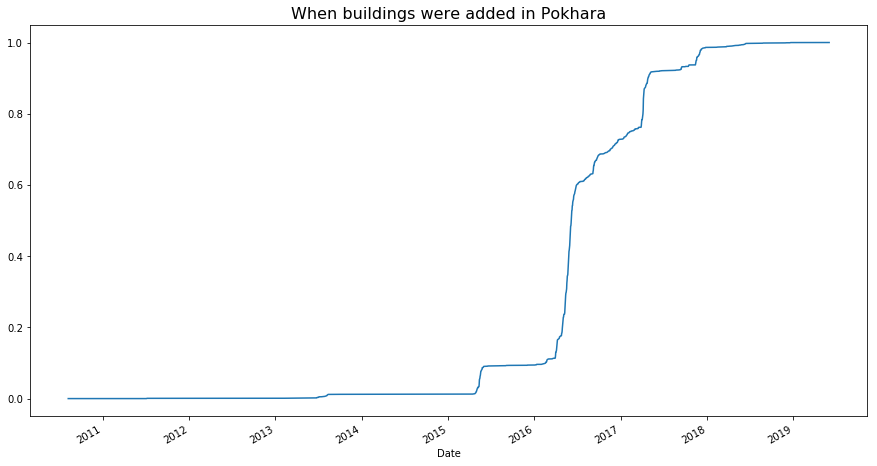

In [6]:
ax = df['object_percent'].cumsum().plot(figsize=(15,8))
ax.set_xlabel("Date"); ax.set_ylabel(""); ax.set_title("When buildings were added in Pokhara",fontsize=16);